In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import time

import libpysal
import pysal as ps

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('C:\\Users\\renan\\Desktop\\inequality')

from segregation.dissimilarity import Dissim
from segregation.spatial_dissimilarity import Spatial_Dissim
from segregation.entropy import Entropy
from segregation.perimeter_area_ratio_spatial_dissimilarity import Perimeter_Area_Ratio_Spatial_Dissim
from segregation.absolute_centralization import Absolute_Centralization
from segregation.absolute_concentration import Absolute_Concentration
from segregation.atkinson import Atkinson
from segregation.bias_corrected_dissimilarity import Bias_Corrected_Dissim
from segregation.boundary_spatial_dissimilarity import Boundary_Spatial_Dissim
from segregation.conprof import Con_Prof
from segregation.correlationr import Correlation_R
from segregation.delta import Delta
from segregation.density_corrected_dissimilarity import Density_Corrected_Dissim
from segregation.exposure import Exposure
from segregation.gini_seg import Gini_Seg
from segregation.isolation import Isolation
from segregation.modified_dissimilarity import Modified_Dissim
from segregation.modified_gini_seg import Modified_Gini_Seg
from segregation.relative_centralization import Relative_Centralization
from segregation.relative_clustering import Relative_Clustering
from segregation.relative_concentration import Relative_Concentration
from segregation.spatial_exposure import Spatial_Exposure
from segregation.spatial_isolation import Spatial_Isolation
from segregation.spatial_prox_profile import Spatial_Prox_Prof
from segregation.spatial_proximity import Spatial_Proximity

from segregation.infer_segregation import Infer_Segregation
from segregation.compare_segregation import Compare_Segregation

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


In [2]:
# Function that perform simulation study:
def segregation_comparison_profile(gdf_1, gdf_2, iterations, null_approach):
    D_1 = Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    G_1 = Gini_Seg(gdf_1, 'group_pop_var', 'total_pop_var')
    H_1 = Entropy(gdf_1, 'group_pop_var', 'total_pop_var')
    A_1 = Atkinson(gdf_1, 'group_pop_var', 'total_pop_var')
    xPy_1 = Exposure(gdf_1, 'group_pop_var', 'total_pop_var')
    xPx_1 = Isolation(gdf_1, 'group_pop_var', 'total_pop_var')
    R_1 = Con_Prof(gdf_1, 'group_pop_var', 'total_pop_var')
    Dbc_1 = Bias_Corrected_Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    Ddc_1 = Density_Corrected_Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    V_1 = Correlation_R(gdf_1, 'group_pop_var', 'total_pop_var')
    Dct_1 = Modified_Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    Gct_1 = Modified_Gini_Seg(gdf_1, 'group_pop_var', 'total_pop_var')
    SD_1 = Spatial_Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    PARD_1 = Perimeter_Area_Ratio_Spatial_Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    BSD_1 = Boundary_Spatial_Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    ACE_1 = Absolute_Centralization(gdf_1, 'group_pop_var', 'total_pop_var')
    #ACO_1 = Absolute_Concentration(gdf_1, 'group_pop_var', 'total_pop_var')
    DEL_1 = Delta(gdf_1, 'group_pop_var', 'total_pop_var')
    RCE_1 = Relative_Centralization(gdf_1, 'group_pop_var', 'total_pop_var')
    RCL_1 = Relative_Clustering(gdf_1, 'group_pop_var', 'total_pop_var')
    #RCO_1 = Relative_Concentration(gdf_1, 'group_pop_var', 'total_pop_var')
    SxPy_1 = Spatial_Exposure(gdf_1, 'group_pop_var', 'total_pop_var')
    SxPx_1 = Spatial_Isolation(gdf_1, 'group_pop_var', 'total_pop_var')
    SPP_1 = Spatial_Prox_Prof(gdf_1, 'group_pop_var', 'total_pop_var')
    SP_1 = Spatial_Proximity(gdf_1, 'group_pop_var', 'total_pop_var')
    
    D_2 = Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    G_2 = Gini_Seg(gdf_2, 'group_pop_var', 'total_pop_var')
    H_2 = Entropy(gdf_2, 'group_pop_var', 'total_pop_var')
    A_2 = Atkinson(gdf_2, 'group_pop_var', 'total_pop_var')
    xPy_2 = Exposure(gdf_2, 'group_pop_var', 'total_pop_var')
    xPx_2 = Isolation(gdf_2, 'group_pop_var', 'total_pop_var')
    R_2 = Con_Prof(gdf_2, 'group_pop_var', 'total_pop_var')
    Dbc_2 = Bias_Corrected_Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    Ddc_2 = Density_Corrected_Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    V_2 = Correlation_R(gdf_2, 'group_pop_var', 'total_pop_var')
    Dct_2 = Modified_Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    Gct_2 = Modified_Gini_Seg(gdf_2, 'group_pop_var', 'total_pop_var')
    SD_2 = Spatial_Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    PARD_2 = Perimeter_Area_Ratio_Spatial_Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    BSD_2 = Boundary_Spatial_Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    ACE_2 = Absolute_Centralization(gdf_2, 'group_pop_var', 'total_pop_var')
    #ACO_2 = Absolute_Concentration(gdf_2, 'group_pop_var', 'total_pop_var')
    DEL_2 = Delta(gdf_2, 'group_pop_var', 'total_pop_var')
    RCE_2 = Relative_Centralization(gdf_2, 'group_pop_var', 'total_pop_var')
    RCL_2 = Relative_Clustering(gdf_2, 'group_pop_var', 'total_pop_var')
    #RCO_2 = Relative_Concentration(gdf_2, 'group_pop_var', 'total_pop_var')
    SxPy_2 = Spatial_Exposure(gdf_2, 'group_pop_var', 'total_pop_var')
    SxPx_2 = Spatial_Isolation(gdf_2, 'group_pop_var', 'total_pop_var')
    SPP_2 = Spatial_Prox_Prof(gdf_2, 'group_pop_var', 'total_pop_var')
    SP_2 = Spatial_Proximity(gdf_2, 'group_pop_var', 'total_pop_var')
    
    all_measures_1 = (D_1, G_1, H_1, xPx_1, xPy_1, A_1, V_1, R_1, Dct_1, Gct_1, Dbc_1, Ddc_1, SPP_1, SD_1, BSD_1, PARD_1, SxPx_1, SxPy_1, SP_1, RCL_1, DEL_1, 
                      #ACO_1, RCO_1, 
                      ACE_1, RCE_1)
    all_measures_2 = (D_2, G_2, H_2, xPx_2, xPy_2, A_2, V_2, R_2, Dct_2, Gct_2, Dbc_2, Ddc_2, SPP_2, SD_2, BSD_2, PARD_2, SxPx_2, SxPy_2, SP_2, RCL_2, DEL_2, 
                      #ACO_2, RCO_2, 
                      ACE_2, RCE_2)
    
    fig = plt.figure(figsize=(30, 20))
    fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

    t0 = time.time()

    res_simul = ()

    for i in range(1, len(all_measures_1)+1):

        t0_i = time.time()
        aux = Compare_Segregation(all_measures_1[i-1], 
                                  all_measures_2[i-1], 
                                  null_approach = null_approach, 
                                  iterations = iterations)
        t1_i = time.time()
        print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
        res_simul += (aux, )

        ax = fig.add_subplot(5, 5, i)
        sns.distplot(aux.est_sim, 
                     color = 'darkblue', 
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'linewidth': 2})
        plt.axvline(aux.est_point_diff, color = 'red', linewidth = 2)
        plt.title('Dif. of {} = {}'.format(aux._class_name, round(aux.est_point_diff, 3)), fontweight = "bold", fontsize = 13)

    t1 = time.time()

    total = t1 - t0
    print('Total Time = {}'.format(total))
    
    return res_simul, total

# Defining the overall number of iteration in this simulation framework

In [3]:
n_overall_iterations = 2

In [4]:
# ?ps.weights.build_lattice_shapefile
ps.weights.build_lattice_shapefile(nrows = 10, ncols = 10, outFileName = 'reg_lat_10_10.shp')
lat_10_10 = gpd.read_file('reg_lat_10_10.shp')
lat_10_10.head()

,ID,geometry
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))"
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))"
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))"
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))"
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))"


In [5]:
ps.weights.build_lattice_shapefile(nrows = 12, ncols = 12, outFileName = 'reg_lat_12_12.shp')
lat_12_12 = gpd.read_file('reg_lat_12_12.shp')
lat_12_12.head()

,ID,geometry
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))"
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))"
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))"
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))"
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))"


# First Scenario: Increasing Total Population Over the same distribution minority proportions

It's very likely that the ACO and the RCO will not give valid results in this case, because of their conceptions. In the formulas, you order according to the area size which, in this case, is in the middle of the distribution (the median) so relative will result in division by zero.

In [6]:
# Setup
n_1 = 100000 # Total population 1
n_2 = 150000 # Total population 2

#p = 0.3  # Same global minority proportion
#p = np.linspace(0, 1, len(lat_10_10))  # Gradient Minority proportion
p = np.random.uniform(0, 1, len(lat_10_10))  # Random Uniform Minority proportion

lat_10_10_1 = lat_10_10.copy()
lat_10_10_2 = lat_10_10.copy()

lat_10_10_1['total_pop_var'] = int(n_1 * 1/len(lat_10_10_1))
lat_10_10_2['total_pop_var'] = int(n_2 * 1/len(lat_10_10_2))

lat_10_10_1['group_pop_var'] = lat_10_10_1['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.000, size = len(lat_10_10_1)))
lat_10_10_2['group_pop_var'] = lat_10_10_2['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.000, size = len(lat_10_10_2)))

lat_10_10_1.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1000,392.401946
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1000,81.198558
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1000,770.545613
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1000,767.023802
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1000,210.646149


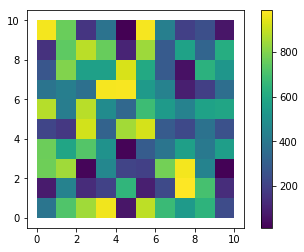

In [7]:
lat_10_10_1.plot(column = 'group_pop_var', legend = True)

In [8]:
lat_10_10_2.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1500,588.602919
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1500,121.797836
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1500,1155.818419
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1500,1150.535703
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1500,315.969224


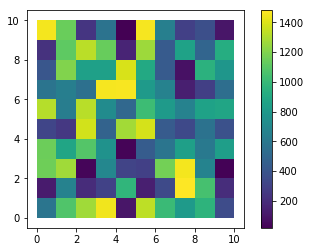

In [9]:
lat_10_10_2.plot(column = 'group_pop_var', legend = True)

Dissim Time = 0.08877277374267578
Gini_Seg Time = 0.11768722534179688
Entropy Time = 0.10144281387329102
Isolation Time = 0.09031462669372559
Exposure Time = 0.08550810813903809
Atkinson Time = 0.09973645210266113
Correlation_R Time = 0.11569070816040039
Con_Prof Time = 1.8373243808746338
Modified_Dissim Time = 4.712123870849609
Modified_Gini_Seg Time = 4.7637107372283936
Bias_Corrected_Dissim Time = 4.586002588272095
Density_Corrected_Dissim Time = 5.467001914978027
Spatial_Prox_Prof Time = 1.0388193130493164
Spatial_Dissim Time = 0.10934948921203613
Boundary_Spatial_Dissim Time = 0.29029297828674316
Perimeter_Area_Ratio_Spatial_Dissim Time = 0.28597402572631836
Spatial_Isolation Time = 0.1406269073486328
Spatial_Exposure Time = 0.15059781074523926
Spatial_Proximity Time = 0.12267112731933594
Relative_Clustering Time = 0.1276545524597168
Delta Time = 0.08735799789428711
Absolute_Centralization Time = 0.145127534866333
Relative_Centralization Time = 0.13652634620666504
Total Time = 24.

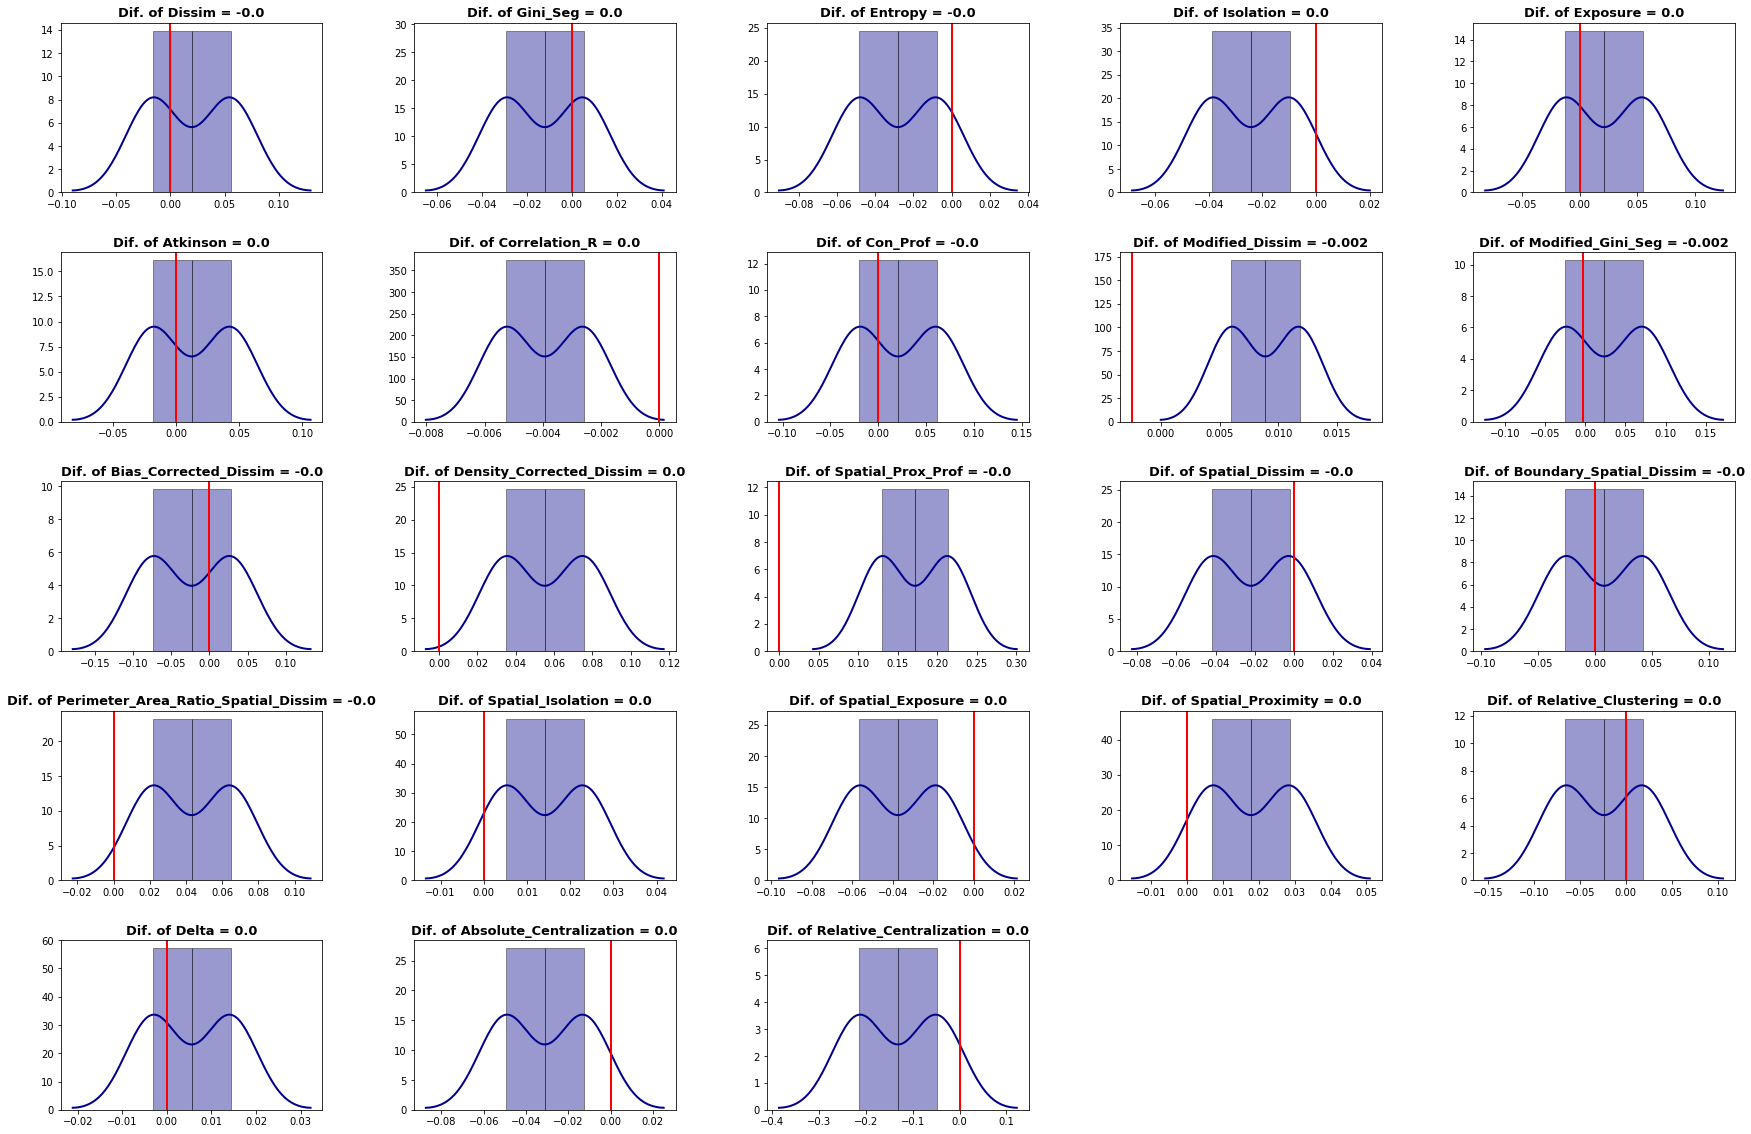

In [10]:
res1_RD = segregation_comparison_profile(lat_10_10_1, 
                                         lat_10_10_2, 
                                         iterations = n_overall_iterations, 
                                         null_approach = "random_data")

Dissim Time = 0.10234212875366211
Gini_Seg Time = 0.0781087875366211
Entropy Time = 0.09373044967651367
Isolation Time = 0.09027838706970215
Exposure Time = 0.07807707786560059
Atkinson Time = 0.09198379516601562
Correlation_R Time = 0.0781104564666748
Con_Prof Time = 1.7024292945861816
Modified_Dissim Time = 5.0997114181518555
Modified_Gini_Seg Time = 5.569613933563232
Bias_Corrected_Dissim Time = 4.579877614974976
Density_Corrected_Dissim Time = 5.4947898387908936
Spatial_Prox_Prof Time = 1.0347132682800293
Spatial_Dissim Time = 0.12676405906677246
Boundary_Spatial_Dissim Time = 0.2837696075439453
Perimeter_Area_Ratio_Spatial_Dissim Time = 0.2857499122619629
Spatial_Isolation Time = 0.10935091972351074
Spatial_Exposure Time = 0.1327669620513916
Spatial_Proximity Time = 0.12219119071960449
Relative_Clustering Time = 0.12732458114624023
Delta Time = 0.09372878074645996
Absolute_Centralization Time = 0.15038824081420898
Relative_Centralization Time = 0.14059209823608398
Total Time = 25.

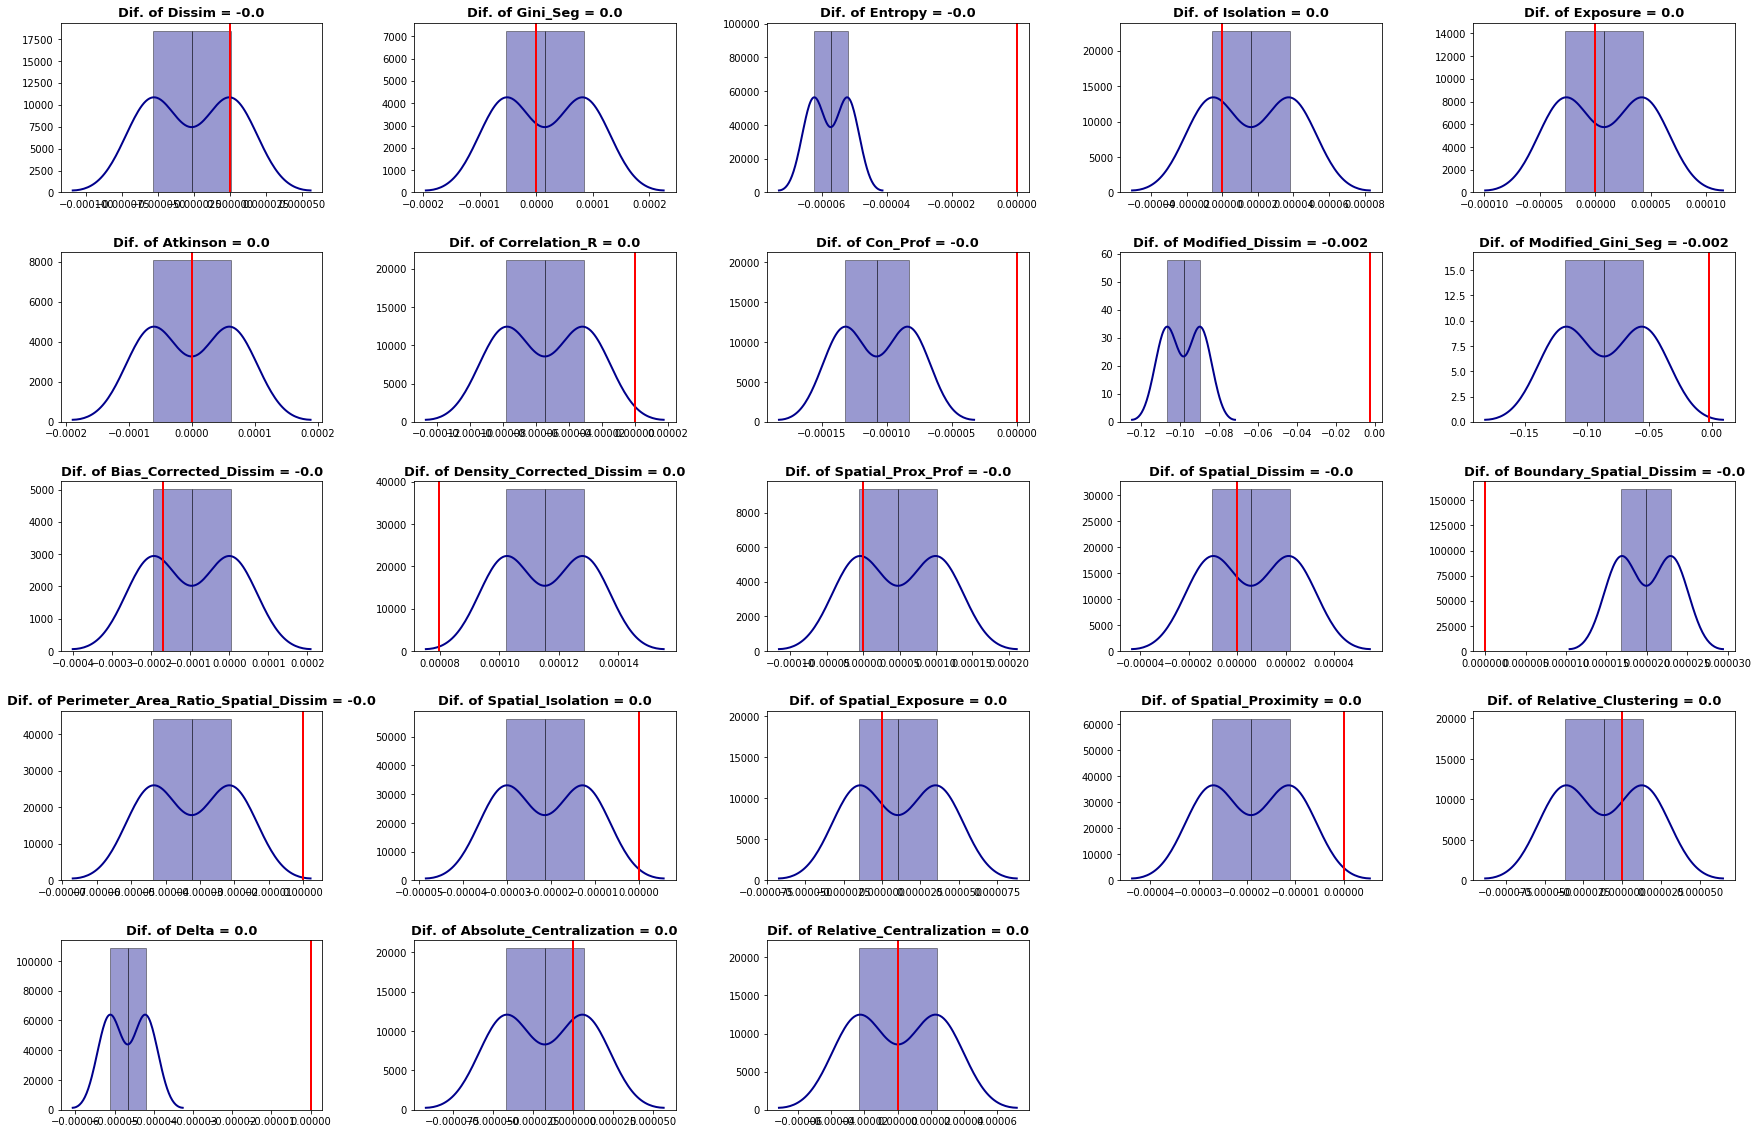

In [11]:
res1_PC = segregation_comparison_profile(lat_10_10_1, 
                                         lat_10_10_2, 
                                         iterations = n_overall_iterations, 
                                         null_approach = "pseudo_cumulative")

# Second Scenario: City Increased of size (spread but kept the same global population) but the overall structure remained the same with roughly eveness

In order to make a fair comparison, it's needed to remain the same structure. In this case, the units have roughly the same global minority. 

In [12]:
# Setup
n = 100000 # Total population

p = 0.3  # Same global minority proportion
#p = np.linspace(0, 1, len(lat_10_10))  # Gradient Minority proportion
#p = np.random.uniform(0, 1, len(lat_10_10))  # Random Uniform Minority proportion

lat_10_10 = lat_10_10.copy()
lat_12_12 = lat_12_12.copy()

lat_10_10['total_pop_var'] = int(n * 1/len(lat_10_10))
lat_12_12['total_pop_var'] = int(n * 1/len(lat_12_12))

lat_10_10['group_pop_var'] = lat_10_10['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.0001, size = len(lat_10_10)))
lat_12_12['group_pop_var'] = lat_12_12['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.0001, size = len(lat_12_12)))

lat_10_10.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1000,300.045313
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1000,300.027135
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1000,299.954076
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1000,299.946931
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1000,299.871666


In [13]:
lat_12_12.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",694,208.066074
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",694,208.260487
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",694,208.198811
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",694,208.189054
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",694,208.208824


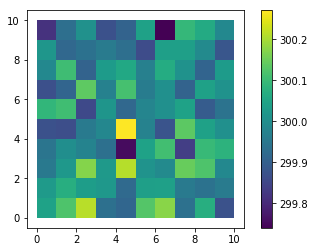

In [14]:
lat_10_10.plot(column = 'group_pop_var', legend = True)

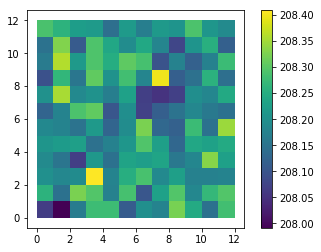

In [15]:
lat_12_12.plot(column = 'group_pop_var', legend = True)

Dissim Time = 0.1134347915649414
Gini_Seg Time = 0.0999915599822998
Entropy Time = 0.08642125129699707
Isolation Time = 0.09798622131347656
Exposure Time = 0.10393333435058594
Atkinson Time = 0.0983884334564209
Correlation_R Time = 0.10681676864624023
Con_Prof Time = 1.7573864459991455
Modified_Dissim Time = 4.523021936416626
Modified_Gini_Seg Time = 4.773474216461182
Bias_Corrected_Dissim Time = 4.401234865188599
Density_Corrected_Dissim Time = 5.58149266242981
Spatial_Prox_Prof Time = 1.0439696311950684
Spatial_Dissim Time = 0.1334972381591797
Boundary_Spatial_Dissim Time = 0.30941009521484375
Perimeter_Area_Ratio_Spatial_Dissim Time = 0.32460927963256836
Spatial_Isolation Time = 0.12500476837158203
Spatial_Exposure Time = 0.13008403778076172
Spatial_Proximity Time = 0.12876129150390625
Relative_Clustering Time = 0.1332700252532959
Delta Time = 0.10937213897705078
Absolute_Centralization Time = 0.14052963256835938
Relative_Centralization Time = 0.13413500785827637
Total Time = 24.659

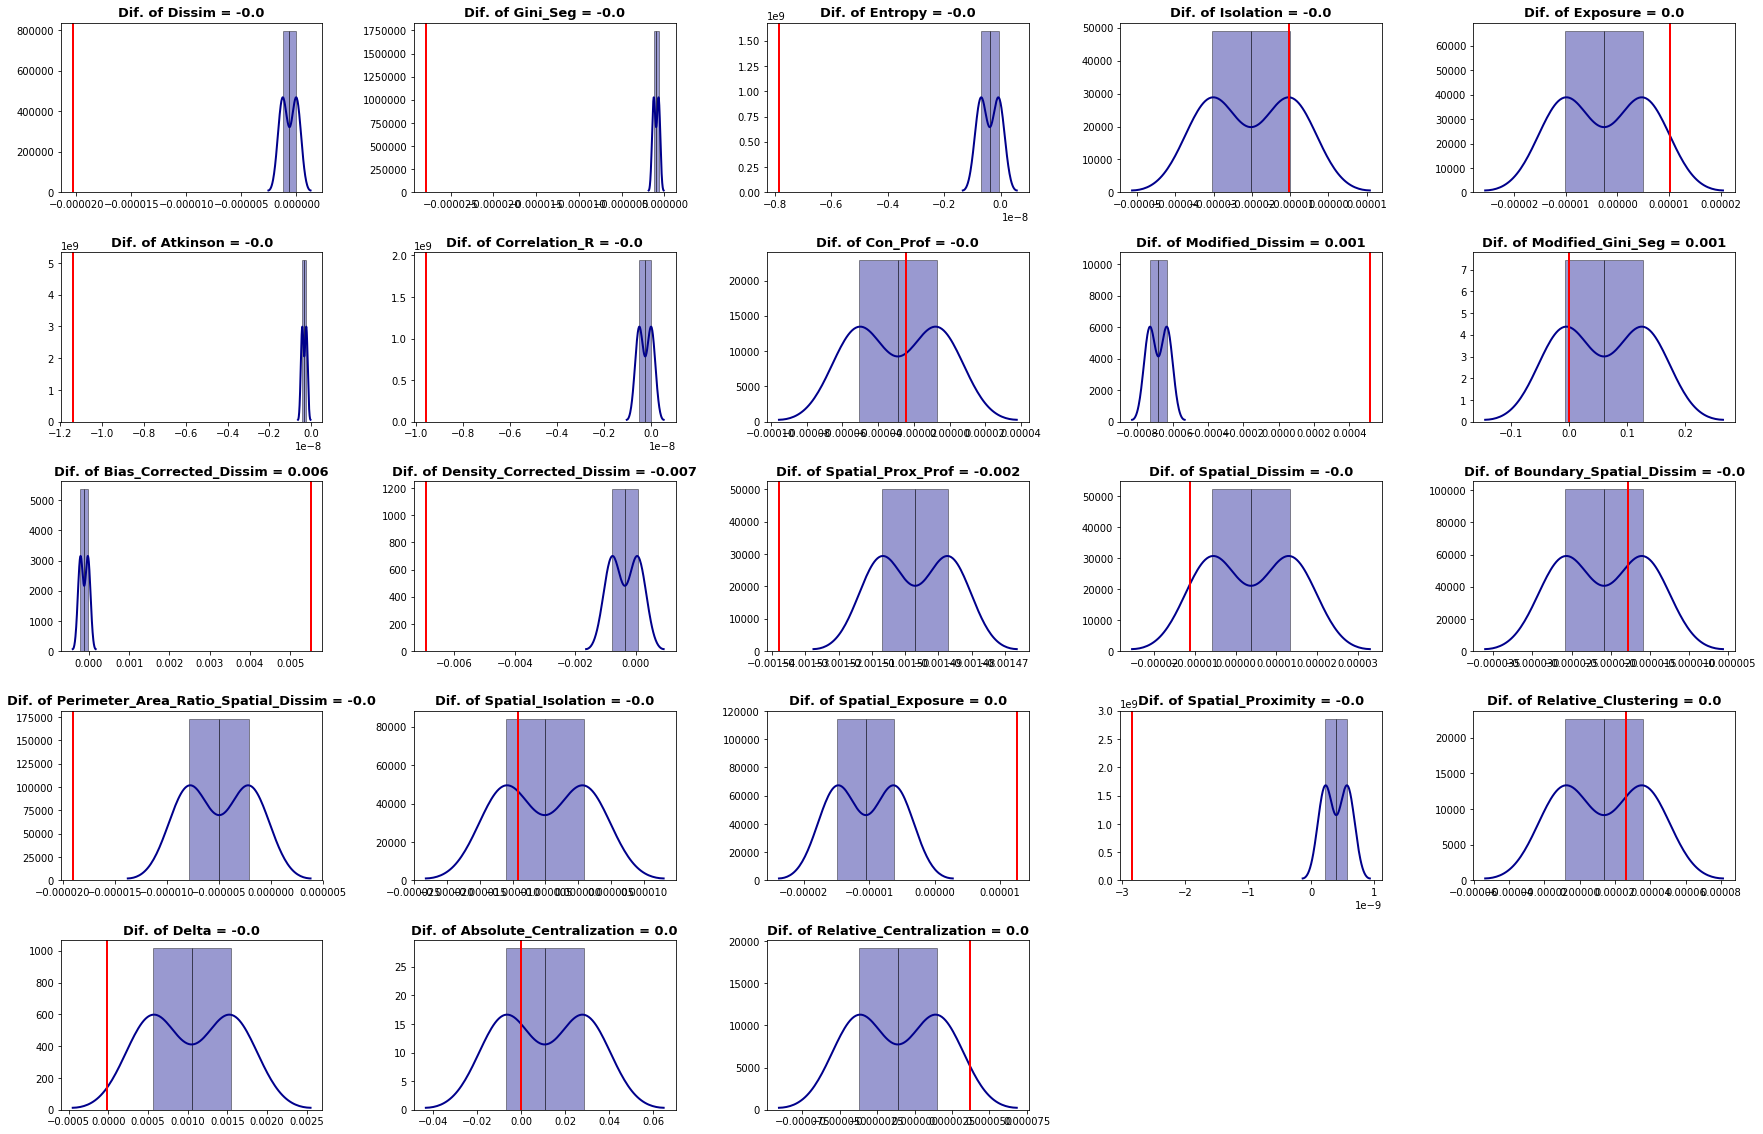

In [16]:
res2_RD = segregation_comparison_profile(lat_10_10, 
                                         lat_12_12, 
                                         iterations = n_overall_iterations, 
                                         null_approach = "random_data")

Dissim Time = 0.10934734344482422
Gini_Seg Time = 0.1034843921661377
Entropy Time = 0.09372830390930176
Isolation Time = 0.08614706993103027
Exposure Time = 0.09369635581970215
Atkinson Time = 0.09372806549072266
Correlation_R Time = 0.10141420364379883
Con_Prof Time = 1.6724963188171387
Modified_Dissim Time = 4.920875549316406
Modified_Gini_Seg Time = 4.982681512832642
Bias_Corrected_Dissim Time = 4.419157266616821
Density_Corrected_Dissim Time = 5.606339454650879
Spatial_Prox_Prof Time = 1.0609190464019775
Spatial_Dissim Time = 0.11961054801940918
Boundary_Spatial_Dissim Time = 0.31328892707824707
Perimeter_Area_Ratio_Spatial_Dissim Time = 0.3244950771331787
Spatial_Isolation Time = 0.13458991050720215
Spatial_Exposure Time = 0.1455059051513672
Spatial_Proximity Time = 0.1165010929107666
Relative_Clustering Time = 0.13035273551940918
Delta Time = 0.10935068130493164
Absolute_Centralization Time = 0.1412651538848877
Relative_Centralization Time = 0.14062142372131348
Total Time = 25.29

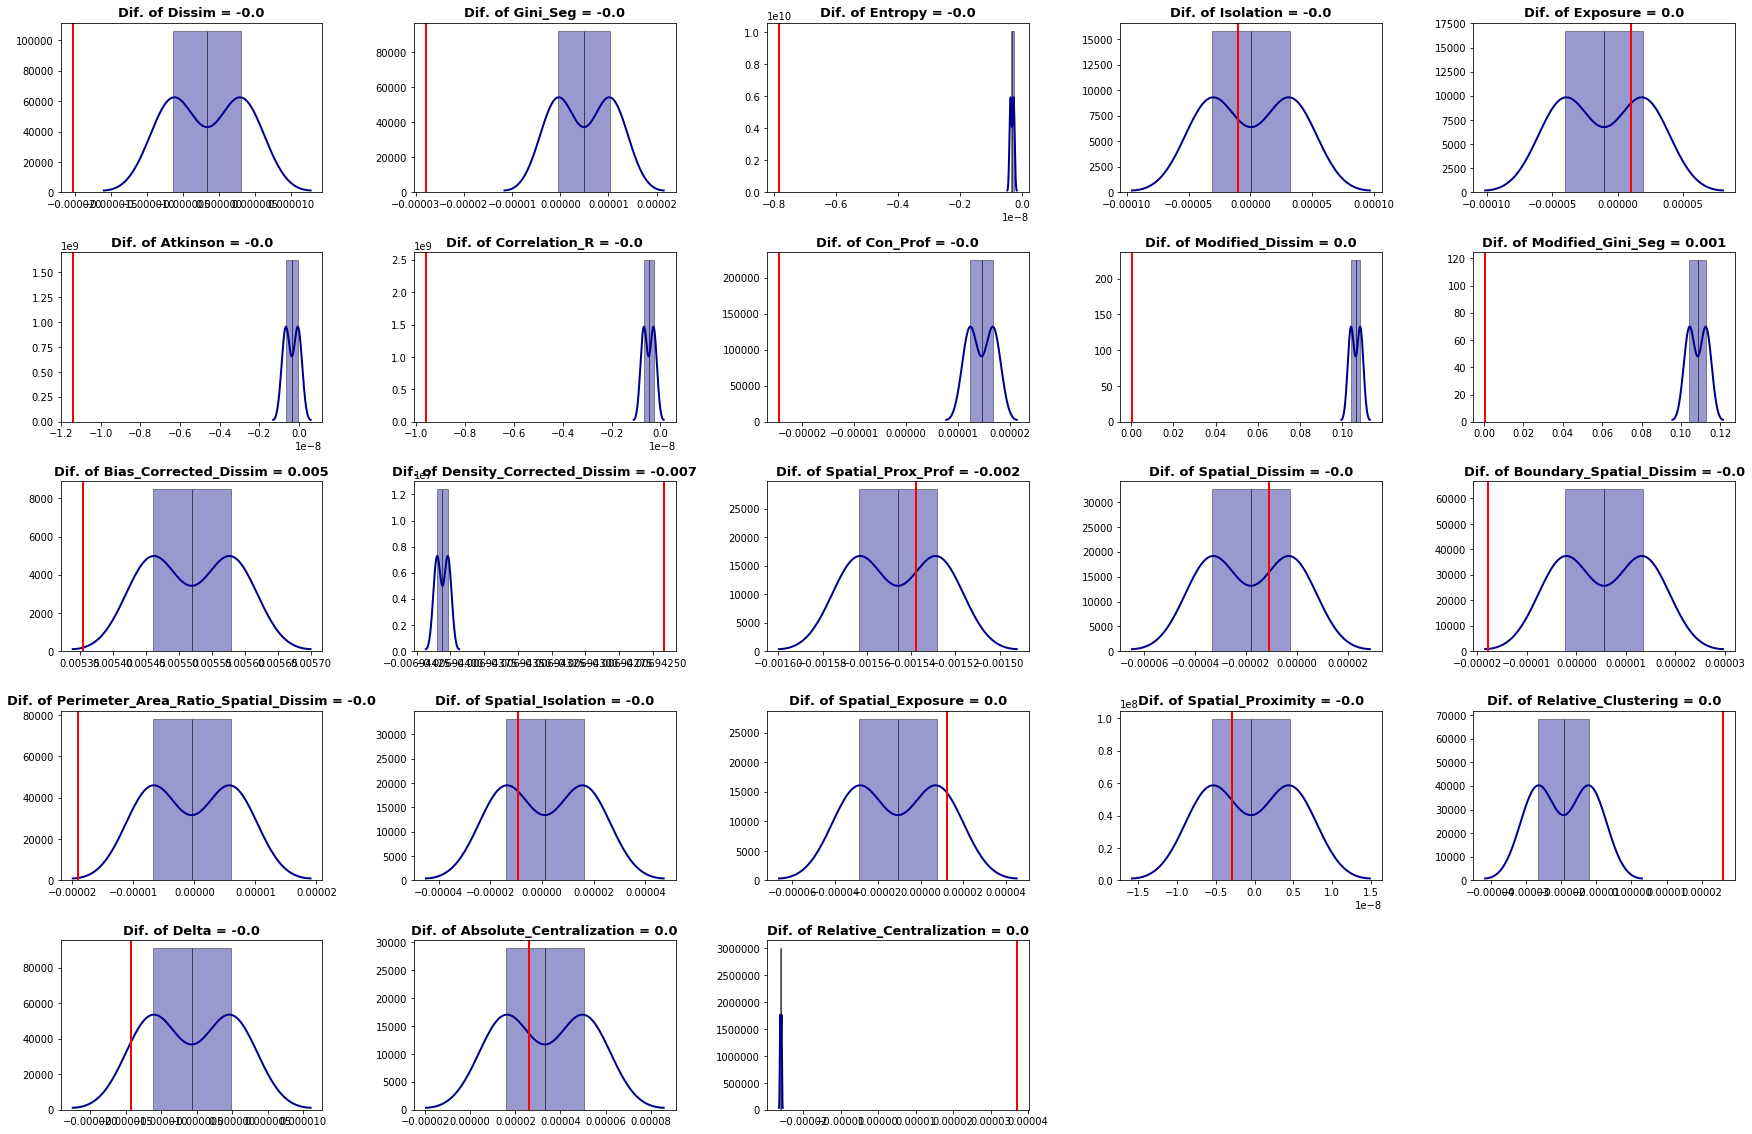

In [17]:
res2_PC = segregation_comparison_profile(lat_10_10, 
                                         lat_12_12, 
                                         iterations = n_overall_iterations, 
                                         null_approach = "pseudo_cumulative")

# Third scenario: the unit composition changed from lower percentages to higher percentages of the minority group

In [18]:
# Setup
n = 100000 # Total population

#p = 0.3  # Same global minority proportion
#p = np.linspace(0, 1, len(lat_10_10))  # Gradient Minority proportion
#p = np.random.uniform(0, 1, len(lat_10_10))  # Random Uniform Minority proportion
p_1 = np.random.beta(a = 2, b = 5, size = 100) / 2 # Divide by 2 to force the generated numbers lie between 0 and 0.5
#p_2 = np.random.beta(a = 5, b = 2, size = 100)

lat_10_10_1 = lat_10_10.copy()
lat_10_10_2 = lat_10_10.copy()

lat_10_10_1['total_pop_var'] = int(n * 1/len(lat_10_10_1))
lat_10_10_2['total_pop_var'] = int(n * 1/len(lat_10_10_2))

lat_10_10_1['group_pop_var'] = lat_10_10_1['total_pop_var'] * p_1
lat_10_10_2['group_pop_var'] = lat_10_10_2['total_pop_var'] * (p_1 + 0.25) # p_2

lat_10_10_1.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1000,139.397018
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1000,96.120800
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1000,313.650695
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1000,89.060802
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1000,72.648660


In [19]:
lat_10_10_2.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1000,389.397018
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1000,346.120800
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1000,563.650695
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1000,339.060802
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1000,322.648660


In [20]:
max(p_1/2)

0.18797542963825142

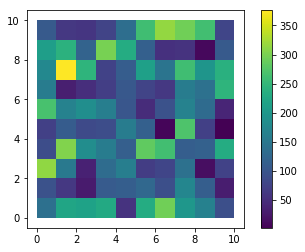

In [21]:
lat_10_10_1.plot(column = 'group_pop_var', legend = True)

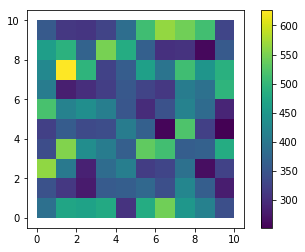

In [22]:
lat_10_10_2.plot(column = 'group_pop_var', legend = True)

Dissim Time = 0.10932040214538574
Gini_Seg Time = 0.09372806549072266
Entropy Time = 0.09723162651062012
Isolation Time = 0.09534120559692383
Exposure Time = 0.10914468765258789
Atkinson Time = 0.09725069999694824
Correlation_R Time = 0.10890817642211914
Con_Prof Time = 1.752027988433838
Modified_Dissim Time = 4.572529077529907
Modified_Gini_Seg Time = 5.121412754058838
Bias_Corrected_Dissim Time = 4.7944324016571045
Density_Corrected_Dissim Time = 5.295949935913086
Spatial_Prox_Prof Time = 1.13533616065979
Spatial_Dissim Time = 0.13473916053771973
Boundary_Spatial_Dissim Time = 0.28752732276916504
Perimeter_Area_Ratio_Spatial_Dissim Time = 0.3269646167755127
Spatial_Isolation Time = 0.16057634353637695
Spatial_Exposure Time = 0.1377241611480713
Spatial_Proximity Time = 0.11160588264465332
Relative_Clustering Time = 0.14347100257873535
Delta Time = 0.12566804885864258
Absolute_Centralization Time = 0.1735832691192627
Relative_Centralization Time = 0.1324143409729004
Total Time = 25.413

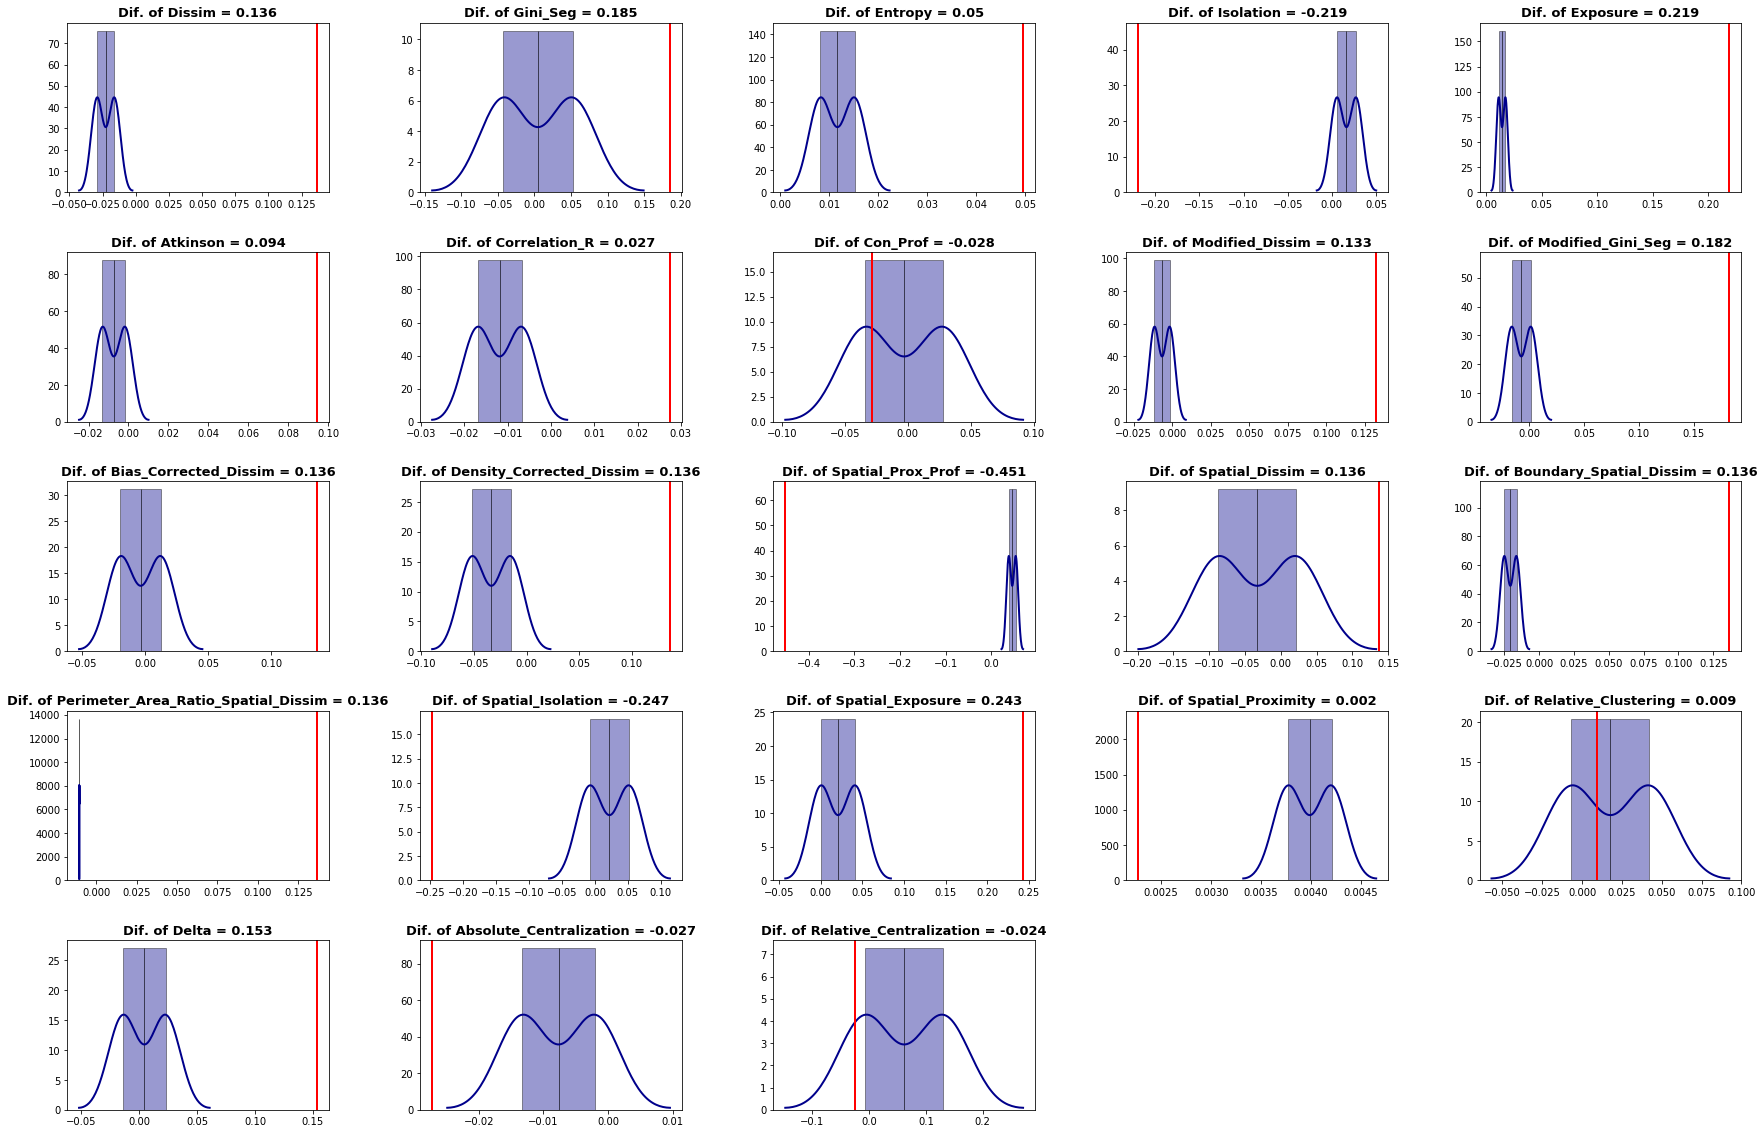

In [23]:
res3_RD = segregation_comparison_profile(lat_10_10_1, 
                                         lat_10_10_2, 
                                         iterations = n_overall_iterations, 
                                         null_approach = "random_data")

Dissim Time = 0.11734342575073242
Gini_Seg Time = 0.08486652374267578
Entropy Time = 0.10547876358032227
Isolation Time = 0.08466887474060059
Exposure Time = 0.11193203926086426
Atkinson Time = 0.09260129928588867
Correlation_R Time = 0.09373903274536133
Con_Prof Time = 1.6645753383636475
Modified_Dissim Time = 4.906054258346558
Modified_Gini_Seg Time = 4.9098289012908936
Bias_Corrected_Dissim Time = 4.340958833694458
Density_Corrected_Dissim Time = 5.173998832702637
Spatial_Prox_Prof Time = 1.037529706954956
Spatial_Dissim Time = 0.12497091293334961
Boundary_Spatial_Dissim Time = 0.2910776138305664
Perimeter_Area_Ratio_Spatial_Dissim Time = 0.28849196434020996
Spatial_Isolation Time = 0.12497210502624512
Spatial_Exposure Time = 0.1301412582397461
Spatial_Proximity Time = 0.12497735023498535
Relative_Clustering Time = 0.1258864402770996
Delta Time = 0.09373879432678223
Absolute_Centralization Time = 0.15676355361938477
Relative_Centralization Time = 0.1376173496246338
Total Time = 24.6

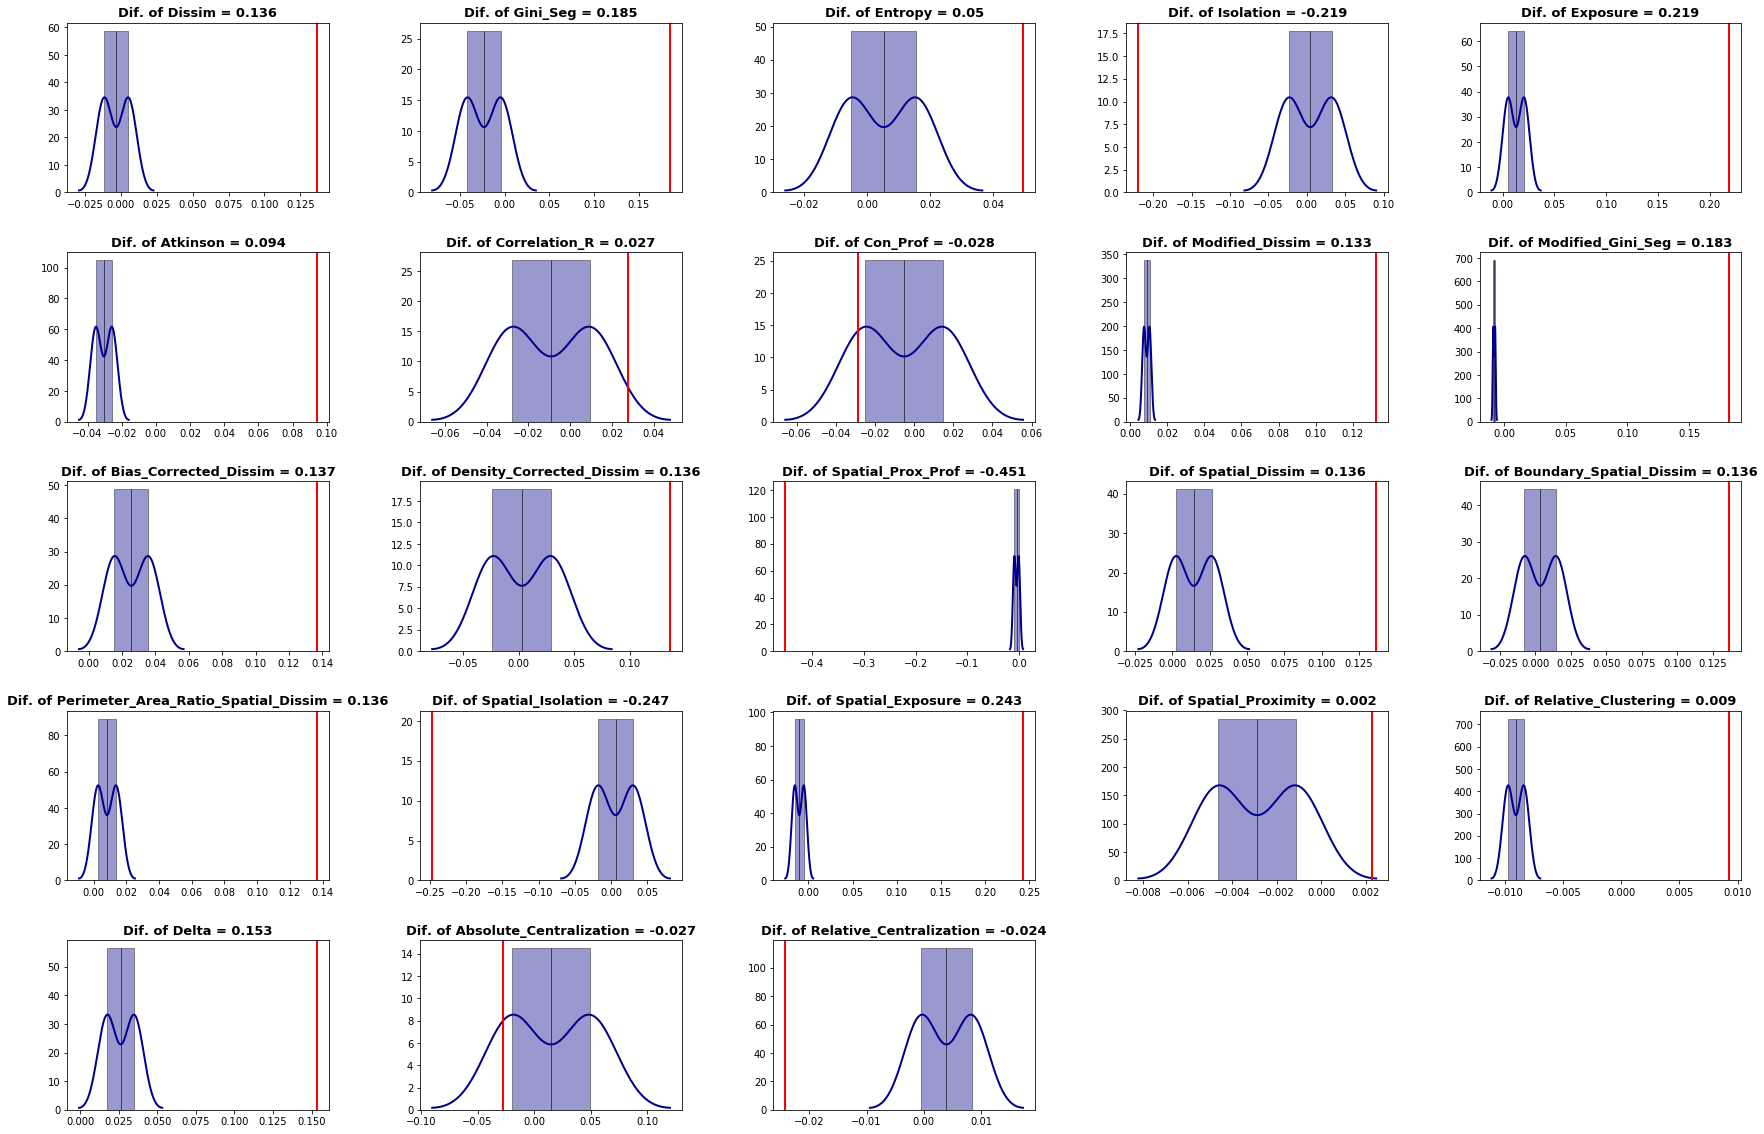

In [24]:
res3_PC = segregation_comparison_profile(lat_10_10_1, 
                                         lat_10_10_2, 
                                         iterations = n_overall_iterations, 
                                         null_approach = "pseudo_cumulative")

# Fourth Scenario: changing the spatial distribution and keeping everything else fixed

In [25]:
# Setup
n = 100000 # Total population

#p = 0.3  # Same global minority proportion
#p = np.linspace(0, 1, len(lat_10_10))  # Gradient Minority proportion
#p = np.random.uniform(0, 1, len(lat_10_10))  # Random Uniform Minority proportion
p_1 = np.random.beta(a = 5, b = 2, size = 100) / 2 # Divide by 2 to force the generated numbers lie between 0 and 0.5
p_2 = np.flip(p_1)

lat_10_10_1 = lat_10_10.copy()
lat_10_10_2 = lat_10_10.copy()

lat_10_10_1['total_pop_var'] = int(n * 1/len(lat_10_10_1))
lat_10_10_2['total_pop_var'] = int(n * 1/len(lat_10_10_2))

lat_10_10_1['group_pop_var'] = lat_10_10_1['total_pop_var'] * p_1
lat_10_10_2['group_pop_var'] = lat_10_10_2['total_pop_var'] * p_2

lat_10_10_1.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1000,480.345820
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1000,300.748892
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1000,256.922350
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1000,379.117271
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1000,407.454073


In [26]:
lat_10_10_2.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1000,428.757608
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1000,323.399832
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1000,375.794601
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1000,375.143325
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1000,247.620142


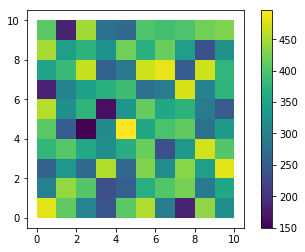

In [27]:
lat_10_10_1.plot(column = 'group_pop_var', legend = True)

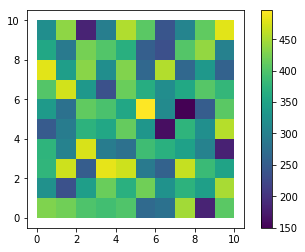

In [28]:
lat_10_10_2.plot(column = 'group_pop_var', legend = True)

In [29]:
lat_10_10_1['group_pop_var'].mean()

353.4810997454347

Dissim Time = 0.10358929634094238
Gini_Seg Time = 0.09372854232788086
Entropy Time = 0.11427569389343262
Isolation Time = 0.09253597259521484
Exposure Time = 0.10406160354614258
Atkinson Time = 0.09879517555236816
Correlation_R Time = 0.10376214981079102
Con_Prof Time = 1.7961409091949463
Modified_Dissim Time = 4.4843878746032715
Modified_Gini_Seg Time = 5.040236711502075
Bias_Corrected_Dissim Time = 4.766812801361084
Density_Corrected_Dissim Time = 5.149600505828857
Spatial_Prox_Prof Time = 1.0847458839416504
Spatial_Dissim Time = 0.1249704360961914
Boundary_Spatial_Dissim Time = 0.2959263324737549
Perimeter_Area_Ratio_Spatial_Dissim Time = 0.2896411418914795
Spatial_Isolation Time = 0.1273787021636963
Spatial_Exposure Time = 0.13797998428344727
Spatial_Proximity Time = 0.17057442665100098
Relative_Clustering Time = 0.1403059959411621
Delta Time = 0.12348461151123047
Absolute_Centralization Time = 0.15076923370361328
Relative_Centralization Time = 0.15440988540649414
Total Time = 25.0

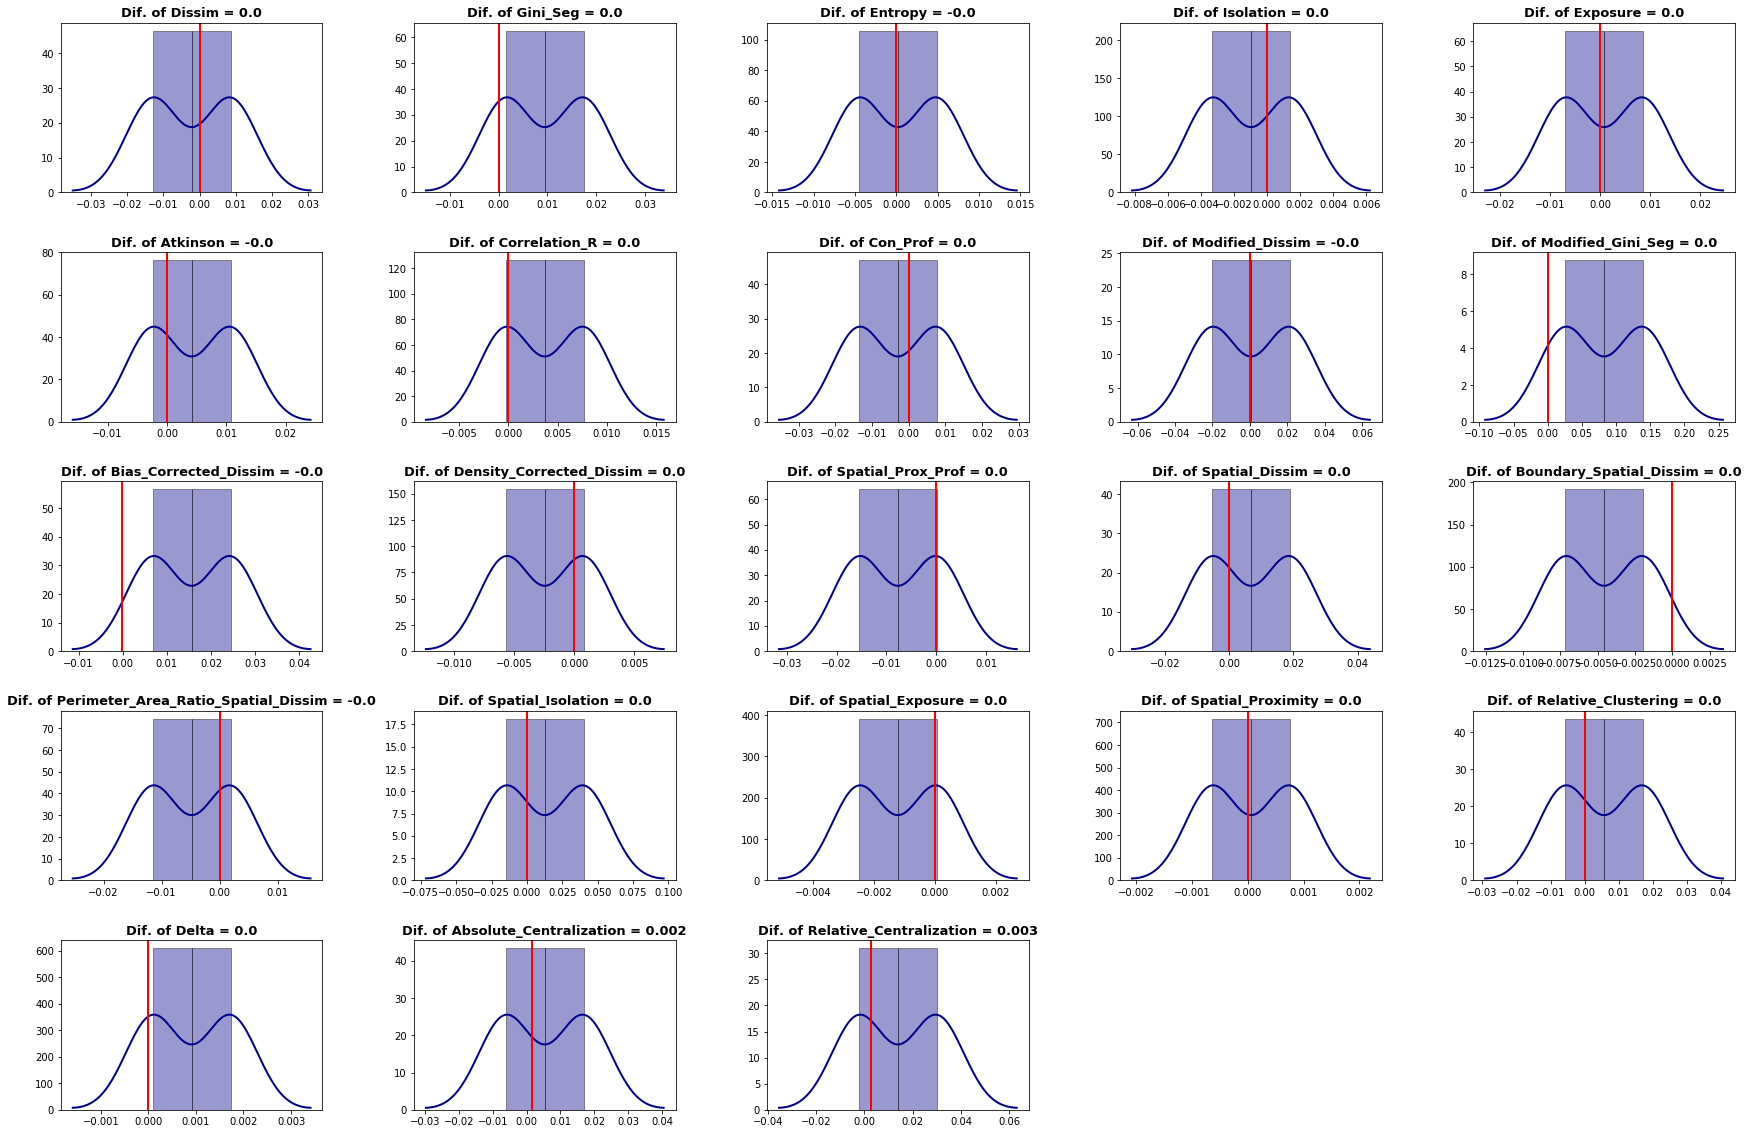

In [30]:
res4_RD = segregation_comparison_profile(lat_10_10_1, 
                                         lat_10_10_2, 
                                         iterations = n_overall_iterations, 
                                         null_approach = "random_data")

Dissim Time = 0.1275012493133545
Gini_Seg Time = 0.10045337677001953
Entropy Time = 0.11740279197692871
Isolation Time = 0.10332584381103516
Exposure Time = 0.11782288551330566
Atkinson Time = 0.09635782241821289
Correlation_R Time = 0.10888147354125977
Con_Prof Time = 1.7875151634216309
Modified_Dissim Time = 5.157717704772949
Modified_Gini_Seg Time = 4.984667778015137
Bias_Corrected_Dissim Time = 4.456423282623291
Density_Corrected_Dissim Time = 5.066553354263306
Spatial_Prox_Prof Time = 1.1087114810943604
Spatial_Dissim Time = 0.16361308097839355
Boundary_Spatial_Dissim Time = 0.30000734329223633
Perimeter_Area_Ratio_Spatial_Dissim Time = 0.2958683967590332
Spatial_Isolation Time = 0.11753392219543457
Spatial_Exposure Time = 0.14677691459655762
Spatial_Proximity Time = 0.1253652572631836
Relative_Clustering Time = 0.13840675354003906
Delta Time = 0.10938429832458496
Absolute_Centralization Time = 0.16141414642333984
Relative_Centralization Time = 0.152787446975708
Total Time = 25.30

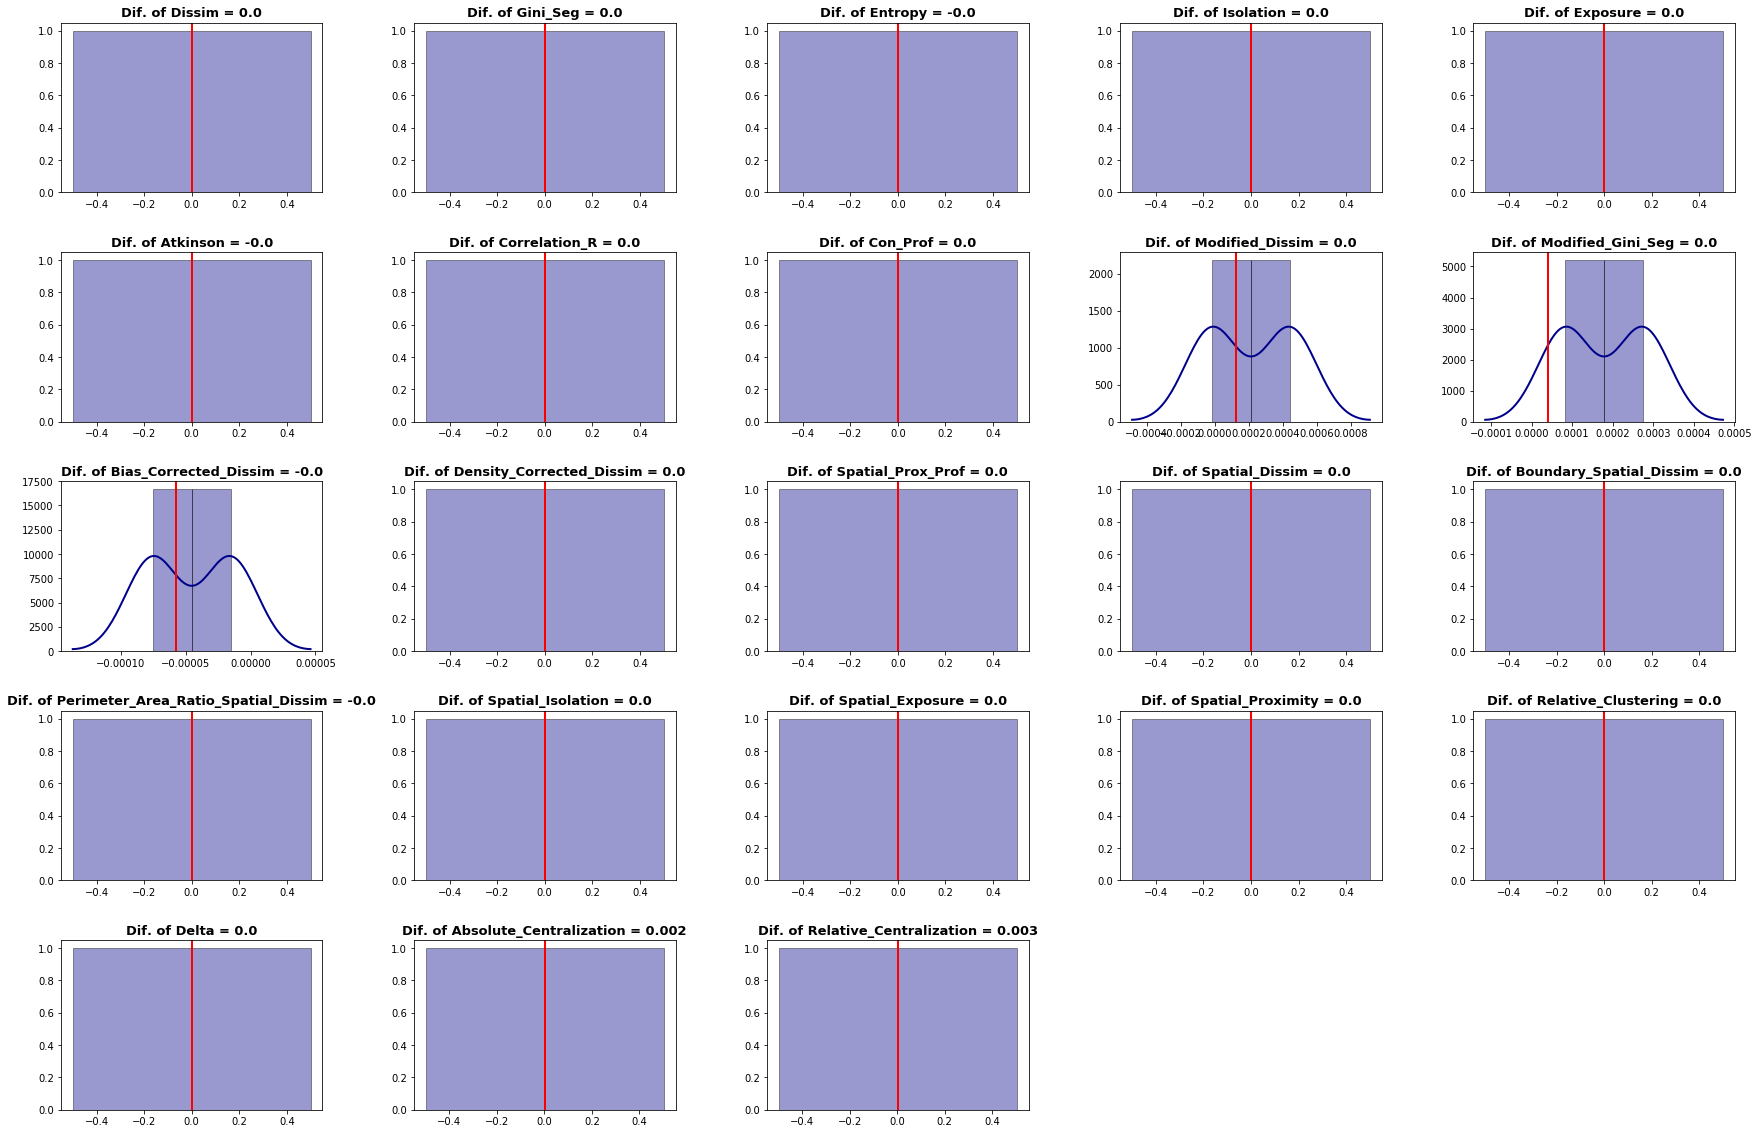

In [31]:
res4_PC = segregation_comparison_profile(lat_10_10_1, 
                                         lat_10_10_2, 
                                         iterations = n_overall_iterations, 
                                         null_approach = "pseudo_cumulative")

------
------
------
------
------
------
------
------
------
------
------

# Concentration Indexes framework: Voronoi polygons for irregular lattices

It was noticed that regular lattices is not appropriate to make comparative segregation measures since they rely in the order of the spatial units according to the area. Therefore, we need to add unit that have uneven area in order to turn this comparison more feasible. We use Voronoi's diagram inspired by https://github.com/pysal/libpysal/blob/master/notebooks/voronoi.ipynb

In [32]:
from libpysal.cg.voronoi  import voronoi, voronoi_frames

In [33]:
n_points = 100
np.random.seed(1234555)
points = tuple(zip(np.random.normal(size = n_points), np.random.normal(size = n_points)))
results = voronoi(points)

regions, vertices = voronoi(points)
regions_df, points_df = voronoi_frames(points, radius = 0.001)

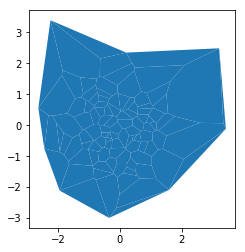

In [34]:
regions_df.plot()

In [35]:
# Function that perform simulation study:
def concentrations_segregation_comparison_profile(gdf_1, gdf_2, iterations, null_approach):
    ACO_1 = Absolute_Concentration(gdf_1, 'group_pop_var', 'total_pop_var')
    RCO_1 = Relative_Concentration(gdf_1, 'group_pop_var', 'total_pop_var')
    
    ACO_2 = Absolute_Concentration(gdf_2, 'group_pop_var', 'total_pop_var')
    RCO_2 = Relative_Concentration(gdf_2, 'group_pop_var', 'total_pop_var')
    
    all_measures_1 = (ACO_1, RCO_1)
    all_measures_2 = (ACO_2, RCO_2)
    
    fig = plt.figure(figsize=(30, 20))
    fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

    t0 = time.time()

    res_simul = ()

    for i in range(1, len(all_measures_1)+1):

        t0_i = time.time()
        aux = Compare_Segregation(all_measures_1[i-1], 
                                  all_measures_2[i-1], 
                                  null_approach = null_approach, 
                                  iterations = iterations)
        t1_i = time.time()
        print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
        res_simul += (aux, )

        ax = fig.add_subplot(5, 5, i)
        sns.distplot(aux.est_sim, 
                     color = 'darkblue', 
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'linewidth': 2})
        plt.axvline(aux.est_point_diff, color = 'red', linewidth = 2)
        plt.title('Dif. of {} = {}'.format(aux._class_name, round(aux.est_point_diff, 3)), fontweight = "bold", fontsize = 13)

    t1 = time.time()

    total = t1 - t0
    print('Total Time = {}'.format(total))
    
    return res_simul, total

# First Scenario for Concentration: increase global population

In [36]:
# Setup
n_1 = 100000 # Total population 1
n_2 = 150000 # Total population 2

p = np.random.uniform(0, 1, len(regions_df))  # Random Uniform Minority proportion

regions_df_1 = regions_df.copy()
regions_df_2 = regions_df.copy()

regions_df_1['total_pop_var'] = int(n_1 * 1/len(regions_df_1))
regions_df_2['total_pop_var'] = int(n_2 * 1/len(regions_df_2))

regions_df_1['group_pop_var'] = regions_df_1['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.000, size = len(regions_df_1)))
regions_df_2['group_pop_var'] = regions_df_2['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.000, size = len(regions_df_2)))

regions_df_1.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1000,774.158313
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1000,330.875223
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1000,733.017172
3,POLYGON ((1.035848795606021 -1.004696637888146...,1000,333.480231
4,POLYGON ((-2.630499038878759 0.557425540744831...,1000,426.916860


In [37]:
regions_df_2.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1500,1161.237470
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1500,496.312835
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1500,1099.525758
3,POLYGON ((1.035848795606021 -1.004696637888146...,1500,500.220347
4,POLYGON ((-2.630499038878759 0.557425540744831...,1500,640.375289


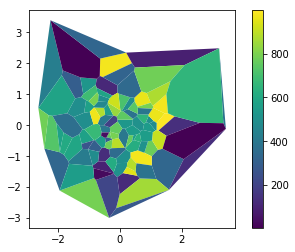

In [38]:
regions_df_1.plot(column = 'group_pop_var', legend = True)

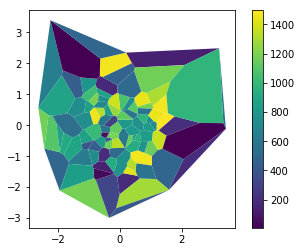

In [39]:
regions_df_2.plot(column = 'group_pop_var', legend = True)

Absolute_Concentration Time = 0.18753290176391602
Relative_Concentration Time = 0.12698602676391602
Total Time = 0.34148192405700684


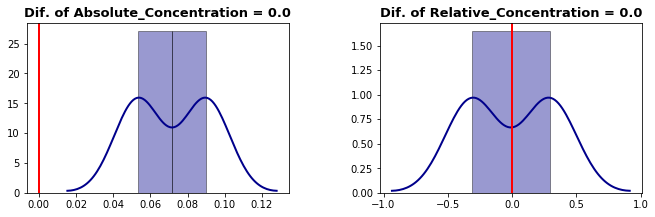

In [40]:
conc_res1_RD = concentrations_segregation_comparison_profile(regions_df_1, 
                                                             regions_df_2, 
                                                             iterations = n_overall_iterations, 
                                                             null_approach = "random_data")

Absolute_Concentration Time = 0.12688875198364258
Relative_Concentration Time = 0.1439063549041748
Total Time = 0.2847614288330078


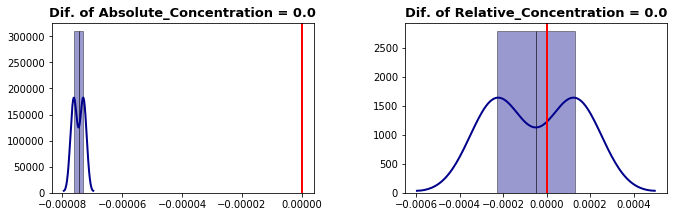

In [41]:
conc_res1_PC = concentrations_segregation_comparison_profile(regions_df_1, 
                                                             regions_df_2, 
                                                             iterations = n_overall_iterations, 
                                                             null_approach = "pseudo_cumulative")

# Second Scenario for Concentration: change spatial topology

In [42]:
n_points2 = 144
np.random.seed(1234557776) # Changed the seed!
points2 = tuple(zip(np.random.normal(size = n_points2), np.random.normal(size = n_points2)))
results2 = voronoi(points2)

regions2, vertices2 = voronoi(points2)
regions_df2, points_df2 = voronoi_frames(points2, radius = 0.001)

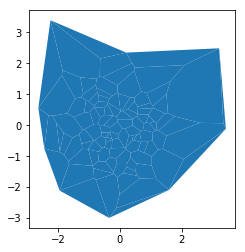

In [43]:
regions_df.plot()

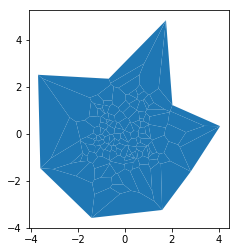

In [44]:
regions_df2.plot()

In [45]:
# Setup
n = 100000 # Total population

p = 0.3  # Same global minority proportion
#p = np.linspace(0, 1, len(lat_10_10))  # Gradient Minority proportion
#p = np.random.uniform(0, 1, len(lat_10_10))  # Random Uniform Minority proportion

regions_df_100 = regions_df.copy()
regions_df_144 = regions_df2.copy()

regions_df_100['total_pop_var'] = int(n * 1/len(regions_df_100))
regions_df_144['total_pop_var'] = int(n * 1/len(regions_df_144))

regions_df_100['group_pop_var'] = regions_df_100['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.0001, size = len(regions_df_100)))
regions_df_144['group_pop_var'] = regions_df_144['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.0001, size = len(regions_df_144)))

regions_df_100.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1000,299.948636
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1000,300.042198
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1000,300.079069
3,POLYGON ((1.035848795606021 -1.004696637888146...,1000,300.048555
4,POLYGON ((-2.630499038878759 0.557425540744831...,1000,300.032568


In [46]:
regions_df_144.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((1.594818548654328 -3.250906495908954...,694,208.126968
1,"POLYGON ((0.6391708453313651 2.09367361909454,...",694,208.200746
2,POLYGON ((0.5037366572615166 -0.64633004129613...,694,208.166375
3,POLYGON ((-1.493598050901387 1.531286068792384...,694,208.232372
4,POLYGON ((-1.896579349124898 -1.18693469064672...,694,208.099963


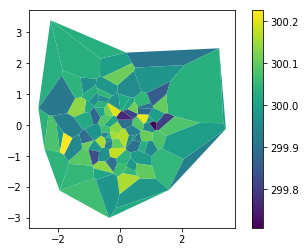

In [47]:
regions_df_100.plot(column='group_pop_var', legend = True)

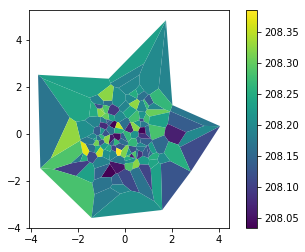

In [48]:
regions_df_144.plot(column='group_pop_var', legend = True)

Absolute_Concentration Time = 0.16660428047180176
Relative_Concentration Time = 0.1326456069946289
Total Time = 0.3261282444000244


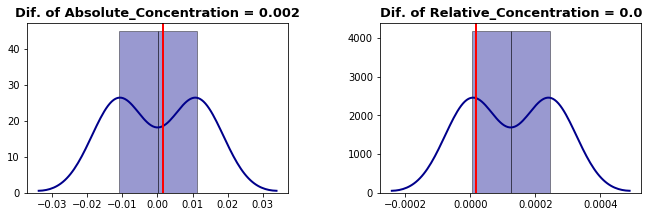

In [49]:
conc_res2_RD = concentrations_segregation_comparison_profile(regions_df_100, 
                                                             regions_df_144, 
                                                             iterations = n_overall_iterations, 
                                                             null_approach = "random_data")

Absolute_Concentration Time = 0.1724870204925537
Relative_Concentration Time = 0.12885475158691406
Total Time = 0.31433844566345215


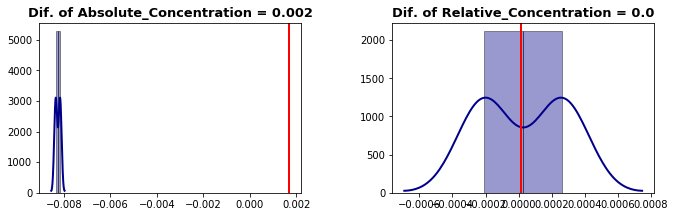

In [50]:
conc_res2_PC = concentrations_segregation_comparison_profile(regions_df_100, 
                                                             regions_df_144, 
                                                             iterations = n_overall_iterations, 
                                                             null_approach = "pseudo_cumulative")

# Third Scenario: composition increased

In [51]:
# Setup
n = 100000 # Total population

p_1 = np.random.beta(a = 2, b = 5, size = 100) / 2 # Divide by 2 to force the generated numbers lie between 0 and 0.5

regions_df_1 = regions_df.copy()
regions_df_2 = regions_df.copy()

regions_df_1['total_pop_var'] = int(n * 1/len(regions_df_1))
regions_df_2['total_pop_var'] = int(n * 1/len(regions_df_2))

regions_df_1['group_pop_var'] = regions_df_1['total_pop_var'] * p_1
regions_df_2['group_pop_var'] = regions_df_2['total_pop_var'] * (p_1 + 0.25) # p_2

regions_df_1.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1000,146.044286
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1000,272.416935
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1000,73.494232
3,POLYGON ((1.035848795606021 -1.004696637888146...,1000,129.657227
4,POLYGON ((-2.630499038878759 0.557425540744831...,1000,38.324615


In [52]:
regions_df_2.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1000,396.044286
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1000,522.416935
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1000,323.494232
3,POLYGON ((1.035848795606021 -1.004696637888146...,1000,379.657227
4,POLYGON ((-2.630499038878759 0.557425540744831...,1000,288.324615


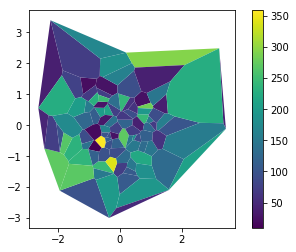

In [53]:
regions_df_1.plot(column='group_pop_var', legend = True)

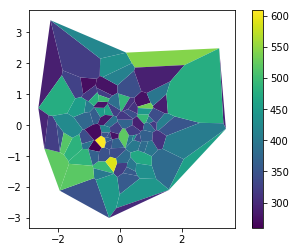

In [54]:
regions_df_2.plot(column='group_pop_var', legend = True)

Absolute_Concentration Time = 0.15854501724243164
Relative_Concentration Time = 0.1461489200592041
Total Time = 0.330639123916626


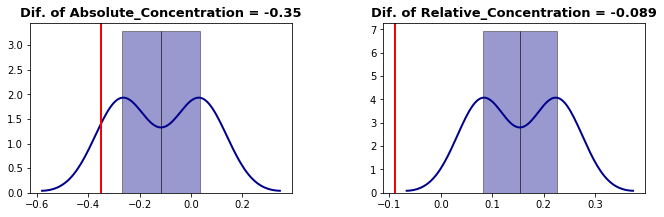

In [55]:
conc_res3_RD = concentrations_segregation_comparison_profile(regions_df_1, 
                                                             regions_df_2, 
                                                             iterations = n_overall_iterations, 
                                                             null_approach = "random_data")

Absolute_Concentration Time = 0.13669657707214355
Relative_Concentration Time = 0.13590645790100098
Total Time = 0.3031749725341797


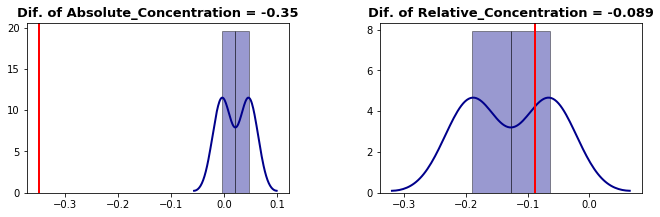

In [56]:
conc_res3_PC = concentrations_segregation_comparison_profile(regions_df_1, 
                                                             regions_df_2, 
                                                             iterations = n_overall_iterations, 
                                                             null_approach = "pseudo_cumulative")

# Fourth Scenario: changing spatial distribution

In [57]:
# Setup
n = 100000 # Total population

p_1 = np.random.beta(a = 5, b = 2, size = 100) / 2 # Divide by 2 to force the generated numbers lie between 0 and 0.5
p_2 = np.flip(p_1)

regions_df_1 = regions_df.copy()
regions_df_2 = regions_df.copy()

regions_df_1['total_pop_var'] = int(n * 1/len(regions_df_1))
regions_df_2['total_pop_var'] = int(n * 1/len(regions_df_2))

regions_df_1['group_pop_var'] = regions_df_1['total_pop_var'] * p_1
regions_df_2['group_pop_var'] = regions_df_2['total_pop_var'] * p_2

regions_df_1.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1000,401.535941
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1000,239.971608
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1000,397.157816
3,POLYGON ((1.035848795606021 -1.004696637888146...,1000,329.862668
4,POLYGON ((-2.630499038878759 0.557425540744831...,1000,350.851455


In [58]:
regions_df_2.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1000,475.310502
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1000,444.249085
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1000,385.048621
3,POLYGON ((1.035848795606021 -1.004696637888146...,1000,414.546134
4,POLYGON ((-2.630499038878759 0.557425540744831...,1000,381.608928


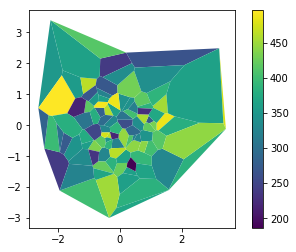

In [59]:
regions_df_1.plot(column='group_pop_var', legend = True)

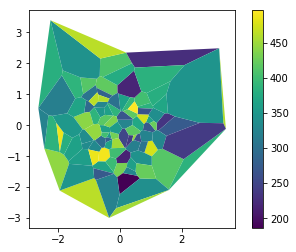

In [60]:
regions_df_2.plot(column='group_pop_var', legend = True)

Absolute_Concentration Time = 0.15859746932983398
Relative_Concentration Time = 0.17552995681762695
Total Time = 0.362994909286499


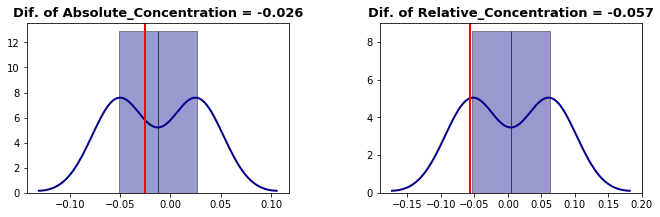

In [61]:
conc_res4_RD = concentrations_segregation_comparison_profile(regions_df_1, 
                                                             regions_df_2, 
                                                             iterations = n_overall_iterations, 
                                                             null_approach = "random_data")

Absolute_Concentration Time = 0.16756987571716309
Relative_Concentration Time = 0.14708900451660156
Total Time = 0.34422922134399414


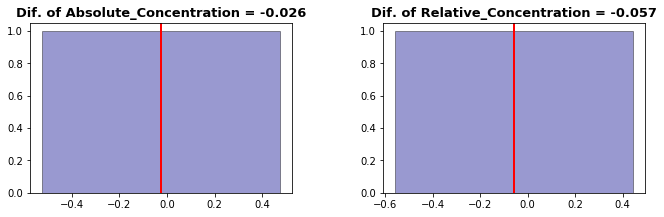

In [62]:
conc_res4_PC = concentrations_segregation_comparison_profile(regions_df_1, 
                                                             regions_df_2, 
                                                             iterations = n_overall_iterations, 
                                                             null_approach = "pseudo_cumulative")